## Sandip's CNN Model

Based on: https://fairyonice.github.io/achieving-top-23-in-kaggles-facial-keypoints-detection-with-keras-tensorflow.html

This model achieved modest performance in terms of Kaggle's leaderboard, with a top score of 3.53171. 

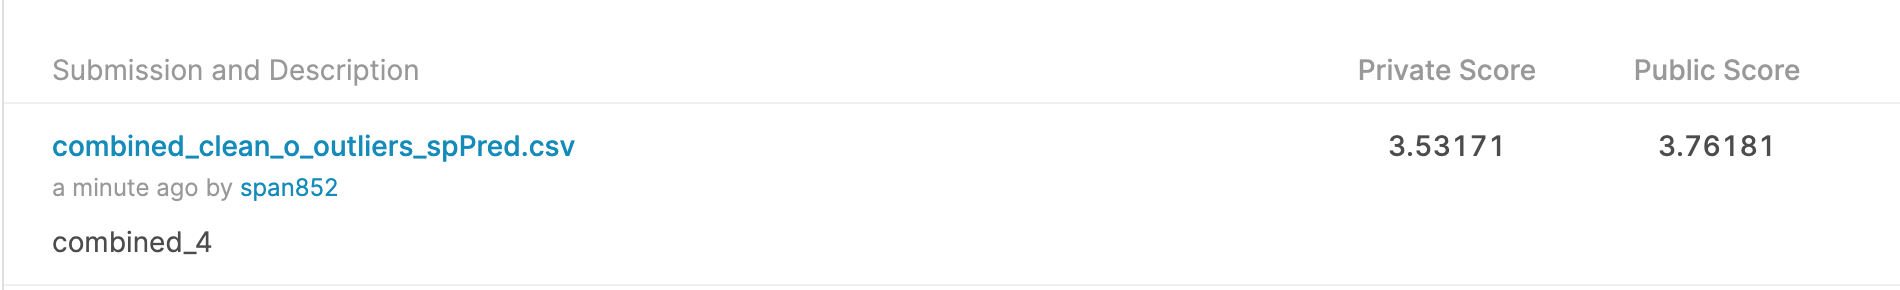

### Set the utils path to point to the utils directory locally

In [ ]:
UTILS_PATH = "utils"

import os, sys
sys.path.append(UTILS_PATH)
from load_models import LoadTrainModels
from predict_models import PredictModels
from transform_data import TransformData
import imp
import pickle
import pandas as pd

### Set the paths of where the clean file(s) are located

In [ ]:
file_path = "cleantrain/"
trainer = LoadTrainModels("data/models3/", file_path)

trainer.print_paths()

Model dir: data/models3/


### For every version of a clean Train file in a given path, create and save a model

The following cell is a base version.  No transformations to the data were applied and all layers were used from the model.
The following cell produced the prediction with the best result for the clean file named: clean_all_outliers.  This means that the train file that was cleaned by removing all outliers produced the best result with these settings. 

This cell looped through the directory of clean trail files which appears below and created a model for each file. Please refer to the Readme file for more information on each.

![](https://i.imgur.com/S7FhUkH.jpg)

Opening file:  clean_o_outliers.p
Train Shape: (7049, 31)
Begin model and train:
Model name: clean_o_outliers_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_botto

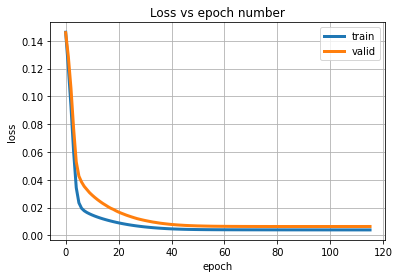

clean_o_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_w_outliers_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
  

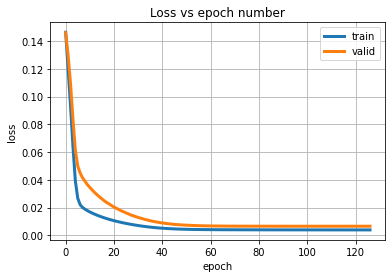

clean_w_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x'

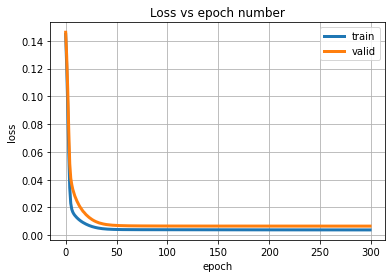

clean_all_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_duplicates.p
Train Shape: (6494, 31)
Begin model and train:
Model name: clean_duplicates_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',


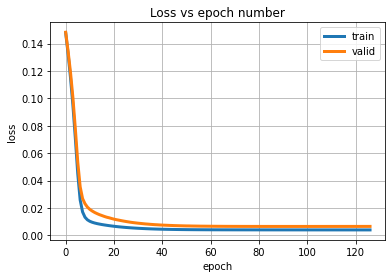

clean_duplicates_sp model created and file saved for future use.
End model and train

Opening file:  clean_o_dups.p
Train Shape: (6483, 31)
Begin model and train:
Model name: clean_o_dups_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mo

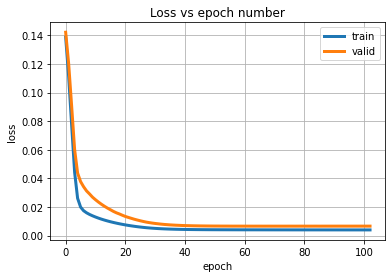

clean_o_dups_sp model created and file saved for future use.
End model and train

Opening file:  clean_w_dups.p
Train Shape: (6488, 31)
Begin model and train:
Model name: clean_w_dups_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_

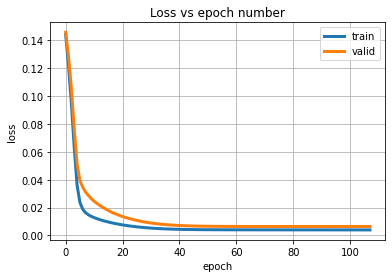

clean_w_dups_sp model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups.p
Train Shape: (6478, 31)
Begin model and train:
Model name: clean_wo_dups_sp
Scaling images
Scaling complete.
Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mout

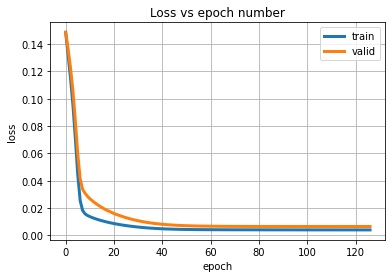

clean_wo_dups_sp model created and file saved for future use.
End model and train



In [ ]:

files = os.listdir(file_path)

#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files: 
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_sp"))
    print("Model name:", model_name)
    model, history = trainer.train_model(model_name, train_data, hoizontal_flip=True,verbose = True)
    print("End model and train")    
    print()

### For every model file in a given path, predict using the model and save the predictions in CSV file

Following the cell above, it's now time to make some predictions.  The following cell loops through the directory and 

for each model (json file)
1. Create a prediction.  The predict_standard makes predictions and stores them in a pred_path location speficied.

Note: If you would like to run this cell, please update the paths accordingly. ### For every model file in a given path, predict using the model and save the predictions in CSV file

In [ ]:


id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models2/"
pred_path = "data/predictions2/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_standard(base_name, filename, model_json, test)
        print("End model and train")    
        print()


Model dir: data/models2/
Prediction dir: data/predictions2/
Working with:  clean_o_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions2/clean_o_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_w_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions2/clean_w_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions2/clean_all_outliers_spPred.csv
Predictions written 
End model and train

Working with:  cle

In [ ]:
file_path = "cleantrain/"
trainer = LoadTrainModels("data/models3/", file_path)
transformdata = TransformData()
trainer.print_paths()

Model dir: data/models3/


### Train the Models Using Transformed Data

This utilizes the transform data function which augments the dataset by concatenating the 7 various datasets with flipped images, essentially doubling the training data. 

Opening file:  clean_o_outliers.p
cleantrain/clean_o_outliers.p
Train Shape: (7049, 31)
Begin model and train:
Model name: clean_o_outliers_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 9189
Number of images to be dimmed: 9189
Completed brighten and dim. Number of observations added to train: 18378
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_______________________________________________________________

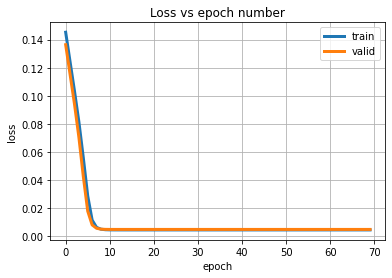

clean_o_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_w_outliers.p
cleantrain/clean_w_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_w_outliers_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 9181
Number of images to be dimmed: 9181
Completed brighten and dim. Number of observations added to train: 18362
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 4

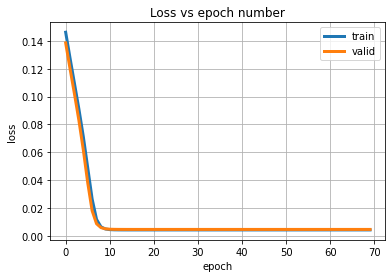

clean_w_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_all_outliers.p
cleantrain/clean_all_outliers.p
Train Shape: (7041, 31)
Begin model and train:
Model name: clean_all_outliers_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 9181
Number of images to be dimmed: 9181
Completed brighten and dim. Number of observations added to train: 18362
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_12 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None,

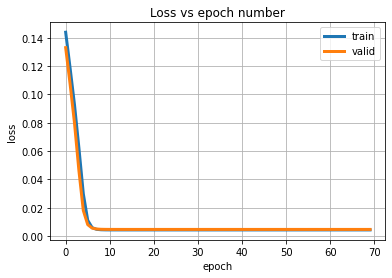

clean_all_outliers_sp model created and file saved for future use.
End model and train

Opening file:  clean_duplicates.p
cleantrain/clean_duplicates.p
Train Shape: (6494, 31)
Begin model and train:
Model name: clean_duplicates_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 8634
Number of images to be dimmed: 8634
Completed brighten and dim. Number of observations added to train: 17268
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47,

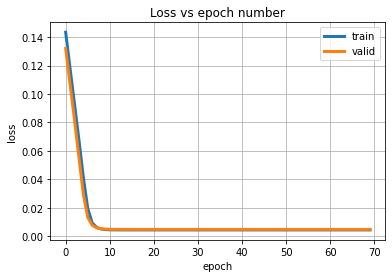

clean_duplicates_sp model created and file saved for future use.
End model and train

Opening file:  clean_o_dups.p
cleantrain/clean_o_dups.p
Train Shape: (6483, 31)
Begin model and train:
Model name: clean_o_dups_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 8623
Number of images to be dimmed: 8623
Completed brighten and dim. Number of observations added to train: 17246
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 32)      

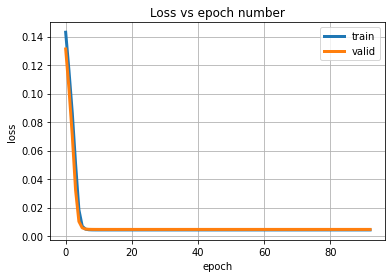

clean_o_dups_sp model created and file saved for future use.
End model and train

Opening file:  clean_w_dups.p
cleantrain/clean_w_dups.p
Train Shape: (6488, 31)
Begin model and train:
Model name: clean_w_dups_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 8628
Number of images to be dimmed: 8628
Completed brighten and dim. Number of observations added to train: 17256
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_30 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 47, 47, 32)        0 

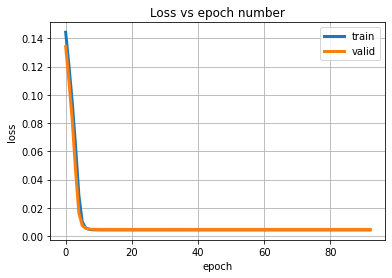

clean_w_dups_sp model created and file saved for future use.
End model and train

Opening file:  clean_wo_dups.p
cleantrain/clean_wo_dups.p
Train Shape: (6478, 31)
Begin model and train:
Model name: clean_wo_dups_sp
Skipping dim
Scaling images
Scaling complete.
Number of images to be brightened: 8618
Number of images to be dimmed: 8618
Completed brighten and dim. Number of observations added to train: 17236
Begining the split of Train with all features
Looking for model SP
SP model file not found. Model creation beginning
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
activation_36 (Activation)   (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 47, 47, 32)       

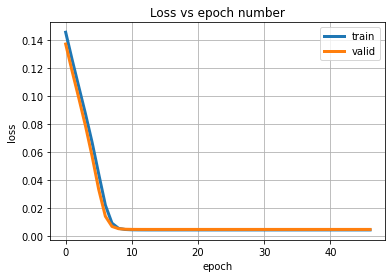

clean_wo_dups_sp model created and file saved for future use.
End model and train



In [ ]:
#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files:
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    print(clean_file)
    train_data = pickle.load( open(clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)
    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_sp"))
    print("Model name:", model_name)

    #Transform the dataset
    flipped = transformdata.FlipHorizontal(train_data)
    train_data = pd.concat([train_data,flipped])
    train_data = transformdata.Bright_Dim(train_data,level_of_brightness = .01)

    #Train the Model using the Flipped Dataset
    model, history = trainer.train_model(model_name, train_data,verbose = True)
    print("End model and train")
    print()

In [ ]:
id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models3/"
pred_path = "data/predictions3/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_standard(base_name, filename, model_json, test)
        print("End model and train")    
        print()


Model dir: data/models3/
Prediction dir: data/predictions3/
Working with:  clean_o_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions3/clean_o_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_w_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions3/clean_w_outliers_spPred.csv
Predictions written 
End model and train

Working with:  clean_all_outliers_sp
Begin Predict
Scaling images
Scaling complete.
Begining the split of Test
End with the split of Test
(27124, 4)
before melt: (1783, 30)
after melt: (53490, 3)
after merge: (27124, 2)
data/predictions3/clean_all_outliers_spPred.csv
Predictions written 
End model and train

Working with:  cle

### Train Models Using 8 Keypoints and Combine

Refer to JCW and JN/LeNet 5 Notebooks for Methodology.

In [ ]:
files = os.listdir(file_path)

#For every version of a cleaned Train file in CleanTrain directory, create and save a model
for filename in files: 
    print("Opening file: ", filename)
    clean_file = "".join((file_path,filename))
    train_data = pickle.load( open( clean_file, "rb" ) )
    train_data = train_data.drop(['level_0', 'check_sum', 'index'], axis=1,errors='ignore')
    print("Train Shape:", train_data.shape)

    filename = str(filename).replace('.p', '').strip()
    print("Begin model and train:")
    model_name = "".join((filename,"_sp"))
    print("Model name:", model_name)
    model, history = trainer.train_model(model_name, train_data, verbose = True, separate=True)
    print("End model and train")    
    print()

### Predict

In [ ]:
id_lookup = pickle.load( open( "data/id_lookup.p", "rb" ) )
test = pickle.load( open( "data/test.p", "rb" ) )

#Using local paths as this is way faster...
file_path = "data/models4/"
pred_path = "data/predictions4/"

predictor = PredictModels(file_path,pred_path , id_lookup)

predictor.print_paths()

files = os.listdir(file_path)
#For every model in file_path, predict using the model and save the predictions in CSV file
for filename in files:
    if ".h5" in filename:
        base_name = filename[:-3]
        model_json = ''.join((base_name,".json"))
        print("Working with: ", base_name)
        print("Begin Predict")
        Y= predictor.predict_standard(base_name, filename, model_json, test, columns=0)
        print("End model and train")    
        print()

In [ ]:
# Combine predictions
predictor.combine_predictions("data/predictions/", "data/predictions4/")